<a href="https://www.kaggle.com/code/omeraydogddu/machine-learning-examples?scriptVersionId=169320905" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kalp-hastaliklari-analizi/ah_kalbim.csv
/kaggle/input/diabetes-dataset/diabetes.csv


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("/kaggle/input/kalp-hastaliklari-analizi/ah_kalbim.csv")
df.head()

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.columns

Index(['yas', 'cinsiyet', 'gogus_agrı_tipi', 'dinlenme_kan_basıncı',
       'Kolesterol', 'Aclık_Kan_Sekeri', 'Elektrokardiyografik_Ölcümü',
       'Ulasılan_maks_kalp_hızı', 'egzersize_baglı_durumu', 'depresyon_ST',
       'egim', 'ca', 'talasemi', 'amac'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yas                          303 non-null    int64  
 1   cinsiyet                     303 non-null    int64  
 2   gogus_agrı_tipi              303 non-null    int64  
 3   dinlenme_kan_basıncı         303 non-null    int64  
 4   Kolesterol                   303 non-null    int64  
 5   Aclık_Kan_Sekeri             303 non-null    int64  
 6   Elektrokardiyografik_Ölcümü  303 non-null    int64  
 7   Ulasılan_maks_kalp_hızı      303 non-null    int64  
 8   egzersize_baglı_durumu       303 non-null    int64  
 9   depresyon_ST                 303 non-null    float64
 10  egim                         303 non-null    int64  
 11  ca                           303 non-null    int64  
 12  talasemi                     303 non-null    int64  
 13  amac                

In [17]:
df.isnull().sum()

yas                            0
cinsiyet                       0
gogus_agrı_tipi                0
dinlenme_kan_basıncı           0
Kolesterol                     0
Aclık_Kan_Sekeri               0
Elektrokardiyografik_Ölcümü    0
Ulasılan_maks_kalp_hızı        0
egzersize_baglı_durumu         0
depresyon_ST                   0
egim                           0
ca                             0
talasemi                       0
amac                           0
dtype: int64

In [18]:
df.eq(0).sum()

yas                              0
cinsiyet                        96
gogus_agrı_tipi                143
dinlenme_kan_basıncı             0
Kolesterol                       0
Aclık_Kan_Sekeri               258
Elektrokardiyografik_Ölcümü    147
Ulasılan_maks_kalp_hızı          0
egzersize_baglı_durumu         204
depresyon_ST                    99
egim                            21
ca                             175
talasemi                         2
amac                           138
dtype: int64

In [19]:
df[['cinsiyet', 'dinlenme_kan_basıncı', 'Aclık_Kan_Sekeri', 'Elektrokardiyografik_Ölcümü', 'egzersize_baglı_durumu', 'depresyon_ST', 'egim','ca','talasemi','amac']] = \
df[['cinsiyet', 'dinlenme_kan_basıncı', 'Aclık_Kan_Sekeri', 'Elektrokardiyografik_Ölcümü', 'egzersize_baglı_durumu', 'depresyon_ST', 'egim','ca','talasemi','amac']].replace(0,np.NaN)

In [20]:
df

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
0,63,1.0,3,145,233,1.0,NaN,150,NaN,2.3,NaN,NaN,1.0,1.0
1,37,1.0,2,130,250,NaN,1.0,187,NaN,3.5,NaN,NaN,2.0,1.0
2,41,NaN,1,130,204,NaN,NaN,172,NaN,1.4,2.0,NaN,2.0,1.0
3,56,1.0,1,120,236,NaN,1.0,178,NaN,0.8,2.0,NaN,2.0,1.0
4,57,NaN,0,120,354,NaN,1.0,163,1.0,0.6,2.0,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,NaN,0,140,241,NaN,1.0,123,1.0,0.2,1.0,NaN,3.0,NaN
299,45,1.0,3,110,264,NaN,1.0,132,NaN,1.2,1.0,NaN,3.0,NaN
300,68,1.0,0,144,193,1.0,1.0,141,NaN,3.4,1.0,2.0,3.0,NaN
301,57,1.0,0,130,131,NaN,1.0,115,1.0,1.2,1.0,1.0,3.0,NaN


In [21]:
df.fillna(df.mean(), inplace = True)

In [22]:
df.eq(0).sum()

yas                              0
cinsiyet                         0
gogus_agrı_tipi                143
dinlenme_kan_basıncı             0
Kolesterol                       0
Aclık_Kan_Sekeri                 0
Elektrokardiyografik_Ölcümü      0
Ulasılan_maks_kalp_hızı          0
egzersize_baglı_durumu           0
depresyon_ST                     0
egim                             0
ca                               0
talasemi                         0
amac                             0
dtype: int64

In [23]:
korelasyonlar = df.corr()
korelasyonlar

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,amac
yas,1.000000,NaN,-0.068653,0.279351,0.213678,NaN,0.101137,-0.398522,NaN,0.047110,-0.191138,-0.030479,0.066047,NaN
cinsiyet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gogus_agrı_tipi,-0.068653,NaN,1.000000,0.047608,-0.076904,NaN,-0.059382,0.295762,NaN,-0.135016,0.159611,-0.035940,-0.169183,NaN
dinlenme_kan_basıncı,0.279351,NaN,0.047608,1.000000,0.123174,NaN,0.074064,-0.046698,NaN,0.164250,-0.058046,0.100845,0.059928,NaN
Kolesterol,0.213678,NaN,-0.076904,0.123174,1.000000,NaN,0.053656,-0.009940,NaN,0.016744,-0.041044,0.005787,0.085342,NaN
Aclık_Kan_Sekeri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elektrokardiyografik_Ölcümü,0.101137,NaN,-0.059382,0.074064,0.053656,NaN,1.000000,-0.129996,NaN,0.161232,-0.105025,0.027214,-0.065868,NaN
Ulasılan_maks_kalp_hızı,-0.398522,NaN,0.295762,-0.046698,-0.009940,NaN,-0.129996,1.000000,NaN,-0.134760,0.448519,0.027268,-0.117741,NaN
egzersize_baglı_durumu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depresyon_ST,0.047110,NaN,-0.135016,0.164250,0.016744,NaN,0.161232,-0.134760,NaN,1.000000,-0.139157,0.114965,0.100438,NaN


<AxesSubplot:>

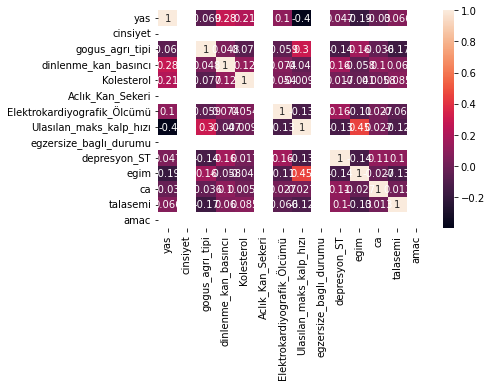

In [24]:
import seaborn as sns
sns.heatmap(korelasyonlar, annot=True)

In [25]:
korelasyonlar.nlargest(4,'yas').index

Index(['yas', 'dinlenme_kan_basıncı', 'Kolesterol',
       'Elektrokardiyografik_Ölcümü'],
      dtype='object')

In [26]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
X = df[['yas', 'cinsiyet', 'Kolesterol']]
y = df.iloc[:,8]

In [27]:
log_reg = linear_model.LogisticRegression()
log_reg_score = cross_val_score(log_reg, X, y, cv = 10, scoring='accuracy').mean()
log_reg_score

nan

In [28]:
result = []
result.append(log_reg_score)

In [29]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')

In [30]:
linear_svm_score = cross_val_score(linear_svm, x, y, cv = 10, scoring = "accuracy").mean()
linear_svm_score

nan

In [32]:
log_reg.fit(x,y)

NameError: name 'x' is not defined

In [ ]:
def prediction(y,c,K): return log_reg.predict([[y,c,K]])

yas = 100
cinsiyet = 50
Kolesterol = 40

print("prediction: ", prediction(yas,cinsiyet,Kolesterol))

In [33]:
import pickle

filename = 'Data/kalb.sav'
pickle.dump(log_reg, open(filename, 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/kalb.sav'

In [34]:
loaded_model = pickle.load(open(filename, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/kalb.sav'

In [36]:
def prediction(y,c,K): return loaded_model.predict([[y,c,K]])

yas = 75
cinsiyet = 50
Kolesterol = 20
print("prediction: ", prediction(yas, cinsiyet, Kolesterol))

NameError: name 'loaded_model' is not defined